# Lending Club Case Study

### Problem Statement
    You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

    If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

    If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company
    
    

### Criteria - Data understanding  (10%)
* All data quality issues are correctly identified and reported. 
* Wherever required, the meanings of the variables are correctly interpreted and written either in the comments or text.




### This  data is from financial institution that gives out loans. how data is used to minimise the risk of losing money while lending to customers.
#### Looking at the Data_Dictionary we can know about the important fields.
* we have description for **115** fields in the LoanStats tab of data_dictionary
* Also there is a **Note** stating that: ** Employer Title replaces Employer Name for all loans listed after 9/23/2013**

In [404]:
import pandas as pd
#setting to display all columns
pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True
df = pd.read_csv('loan.csv', low_memory=False)
print('shape:',df.shape)
#dftype_dict = df.dtypes.to_dict()
#for col,typ in dftype_dict.items():
    #print(col)

shape: (39717, 111)


From df.shape above steps, We can note that:
   * There are **111** columns in the dataset and not **115** as stated in the data dictionary.-shape: (39717, 111)
   * <font color='red'> Below are the columns that are in data dictionary but missing in data </font>
       * fico_range_high - Key Data missing
       * fico_range_low - Key Data missing
       * last_fico_range_high - Key Data missing
       * last_fico_range_low - Key Data missing
   * There is a trailing space for a column in Data dictionary
       * total_rev_hi_lim"space"
   * Key fields identified to solve this problem are:
       * loan_amnt - 
       * term - 
       * int_rate	
       * installment
       * grade	, sub_grade
       * emp_title ,	emp_length
       * home_ownership
       * annual_inc
       * verification_status	
       * issue_d	
       * loan_status	
       * pymnt_plan - always n
       * desc 
       * purpose , title
       * zip_code	addr_state
       * dti
       * delinq_2yrs  ,	earliest_cr_line	inq_last_6mths
       * mths_since_last_delinq
       * mths_since_last_record
       * open_acc,	pub_rec
       * revol_bal	revol_util
       * total_acc
       * out_prncp	out_prncp_inv
       * total_pymnt	total_pymnt_inv	total_rec_prncp	total_rec_int	total_rec_late_fee
       * recoveries	collection_recovery_fee	last_pymnt_d	last_pymnt_amnt	next_pymnt_d	last_credit_pull_d
       * collections_12_mths_ex_med
       
       * chargeoff_within_12_mths
       *pub_rec_bankruptcies 	,tax_liens
       
       
   

### Criteria - Data Cleaning and Manipulation (20%)
* Data quality issues are addressed in the right way 
  (missing value imputation, outlier treatment and other kinds of data redundancies, etc.). 
* If applicable, data is converted to a suitable and convenient format to work with using the right methods.
* Manipulation of strings and dates is done correctly wherever required.

##### I dentified Data Cleanup requirements
    1. There are many columns with NaN values
    2. There are few colums with same value for all the records - this information is not helpful.
    3. "term" column is String, so removing "months" from feild value of "term" and rename it as "term_in_months"
    4. "int_rate"/revol_util column has '%' - No Math metric, remove '%' from field value of 'int_rate'
    5. process emp_length for - years , + and <
    

###### Step1: Dropping all the colums where NaN is only the value for dtype = ('int64','float64')
**Note:** the difference in shape of dataframe before and after processing.

In [406]:
# 1. There are many columns with NaN values
# 2. There are few colums with same value for all the records - this information is not helpful.
import numpy as np
print('----------------------------------Shape of data frame :',df.shape)
dropcols=[]
dftype_dict = df.dtypes.to_dict()
for col,typ in dftype_dict.items():
    #print(col, typ)
    if  ( len(df[col].unique()) == 1):
        #print("{} has only NaN".format(col))
        #if col in ('delinq_amnt','acc_now_delinq','policy_code'):
        print('Dropping:{} colums with only {} as value. '.format(col,df[col].unique()[0]))
        dropcols.append(col)
df.drop(dropcols, axis=1,  inplace=True)
print('----------------------------------Shape of data after removing only 1 value from frame :',df.shape)
# 3. "term" column is String, so removing "months" from feild value of "term" and rename it as "term_in_months"
df.term.info()
df.term = df.term.apply(lambda x: (x[:-6].lstrip().rstrip()) if ( x.lstrip().lstrip()[-6:]=='months') else x)
df.term = df.term.astype('int64')

# 4. "int_rate"/revol_util column has '%' - No Math metric, remove '%' from field value of 'int_rate'
#int_rate
df.int_rate.info()
df.int_rate = df.int_rate.apply(lambda x: (x[:-1].lstrip().rstrip()) if (x[-1]=='%') else x)
df.int_rate = df.int_rate.astype('float64')
#revol_util
df.revol_util.info()
df.revol_util = df.revol_util.apply(lambda x: str(x)[:-1] if(len(str(x))>0 and str(x)[-1] == '%') else -1)

# 5. process emp_length for - years , + and < (changing < 1 year to 0 and n/a to -1)
df.emp_length.info()
df.emp_length = df.emp_length.apply(lambda x: (str(x).replace('+ years','').replace(' years','').replace(' year','').replace('< 1','0').rstrip().lstrip().replace('nan','-1')) if True else '0')




----------------------------------Shape of data frame : (39717, 111)
Dropping:pymnt_plan colums with only n as value. 
Dropping:initial_list_status colums with only f as value. 
Dropping:mths_since_last_major_derog colums with only nan as value. 
Dropping:policy_code colums with only 1 as value. 
Dropping:application_type colums with only INDIVIDUAL as value. 
Dropping:annual_inc_joint colums with only nan as value. 
Dropping:dti_joint colums with only nan as value. 
Dropping:verification_status_joint colums with only nan as value. 
Dropping:acc_now_delinq colums with only 0 as value. 
Dropping:tot_coll_amt colums with only nan as value. 
Dropping:tot_cur_bal colums with only nan as value. 
Dropping:open_acc_6m colums with only nan as value. 
Dropping:open_il_6m colums with only nan as value. 
Dropping:open_il_12m colums with only nan as value. 
Dropping:open_il_24m colums with only nan as value. 
Dropping:mths_since_rcnt_il colums with only nan as value. 
Dropping:total_bal_il colums 

In [399]:
data = df.groupby(by='emp_length')['emp_length'].count()
df.shape

(39717, 51)

<Axes: >

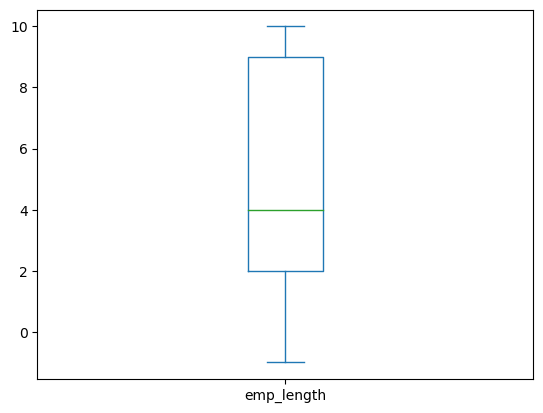

In [397]:
df.emp_length = df.emp_length.astype('float64')
df.emp_length.plot.box()

### Criteria - Data analysis (40%)
 * The right problem is solved which is coherent with the needs of the business. The analysis has a clear structure and the flow is easy to understand.

* Univariate and segmented univariate analysis is done correctly and appropriate realistic assumptions are made wherever required. The analyses successfully identify at least the 5 important driver variables (i.e. variables which are strong indicators of default).

* Business-driven, type-driven and data-driven metrics are created for the important variables and utilised for analysis. The explanation for creating the derived metrics is mentioned and is reasonable.

* Bivariate analysis is performed correctly and is able to identify the important combinations of driver variables. The combinations of variables are chosen such that they make business or analytical sense. 

* The most useful insights are explained correctly in the comments.

* Appropriate plots are created to present the results of the analysis. The choice of plots for respective cases is correct. The plots should clearly present the relevant insights and should be easy to read. The axes and important data points are labelled correctly.

In [ ]:
derived metrics - Loan-fee = loan_amnt- funded_amnt_inv (loan fee charged to customer)
Assumptions:
    Since the location is in the USA - we can assume that ammounts are in USD.



(39717, 51)
(33479, 51)


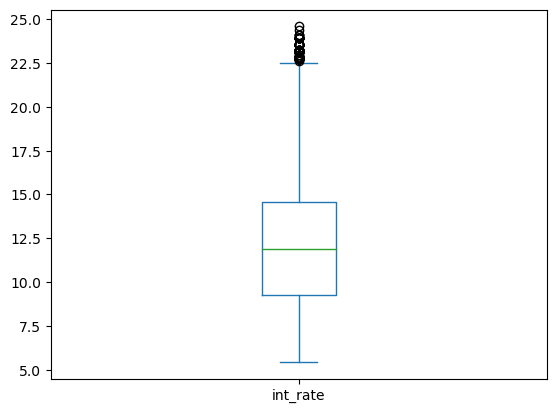

In [407]:
print(df.shape)
df.int_rate.plot.box()    
df = df[df.loan_amnt < 20000]
print(df.shape)


<Axes: >

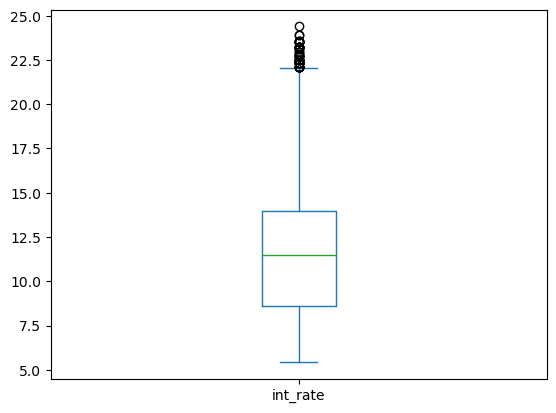

In [408]:
df.int_rate.plot.box() 

### Criteria - Presentation and Recommendations (20%)
* The presentation has a clear structure, is not too long, and explains the most important results concisely in simple language.
* The recommendations to solve the problems are realistic, actionable and coherent with the analysis. 
* The GitHub repository link contains a Python file, presentation file and a README.md file. README.md file should describe the project briefly.
* If any assumptions are made, they are stated clearly.

### Criteria - Conciseness and readability of the code (10%)
* The code is concise and syntactically correct. Wherever appropriate, built-in functions and standard libraries are used instead of writing long code (if-else statements, for loops, etc.).
* Custom functions are used to perform repetitive tasks.
* The code is readable with appropriately named variables and detailed comments are written wherever necessary.

### import python libs
* libs used are pandas, 

In [2]:
import pandas as pd

In [3]:

df = pd.read_csv('loan.csv', low_memory=False)
print('shape:',df.shape)



shape: (39717, 111)


#### to display information on ALL columns
use: pd.set_option('display.max_columns', None)

In [141]:
pd.set_option('display.max_columns', None)
pd.options.mode.copy_on_write = True

In [20]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Please see that all the colums are displayed in the head() above : shape: (39717, 111) - Colums are 111

In [11]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

##### By analysing both df.head(3) and df.describe()[:2] - here are the observations
1. "term" column is String and cannot obtain a Math metric, add/change the columname to "term_in_months" by removing "months" from feild value of "term"
2. "int_rate"/revol_util column has '%' - No Math metric, remove '%' from field value of 'int_rate'
3. "grade" / "sub_grade" are a rating column - as expected, not numeric field
4. "emp_title" looks to be a string column with NaN value in 1st row
5. "emp_length" has years, + , < signs in the values - need to check if it is all in terms of years/year -- does it include months?
6. "verification_status" -> get distinct of status and check what is the diff between - 'Verified' and 'Source Verified'
7. "issue_d" - '_'  in column name -> check the format of the value "Dec-11" is it "11th Dec XXXX" or "Dec 2011"?
8. "url"/"desc" -> see if there is any useful info from the URL.
9. FYI - "earliest_cr_line" / "last_pymnt_d" /"last_credit_pull_d"-> format is "Mon-yy" like "Jan-85" / "Mon-dd" -> Jan-15 / "Mon-dd" -> May-16
10. "mths_since_last_delinq" / "mths_since_last_record" / "annual_inc_joint" /"dti_joint" 
"verification_status_joint","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m"
mths_since_rcnt_il	total_bal_il	il_util	open_rv_12m	open_rv_24m	max_bal_bc	all_util	total_rev_hi_lim	inq_fi	total_cu_tl	inq_last_12m
acc_open_past_24mths	avg_cur_bal	bc_open_to_buy	bc_util		mo_sin_old_il_acct	mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op	mo_sin_rcnt_tl	mort_acc	mths_since_recent_bc	mths_since_recent_bc_dlq	mths_since_recent_inq
mths_since_recent_revol_delinq	num_accts_ever_120_pd	num_actv_bc_tl	num_actv_rev_tl	num_bc_sats	num_bc_tl	num_il_tl	num_op_rev_tl	num_rev_accts	
num_rev_tl_bal_gt_0	num_sats	num_tl_120dpd_2m	num_tl_30dpd	num_tl_90g_dpd_24m	num_tl_op_past_12m	pct_tl_nvr_dlq	percent_bc_gt_75
tot_hi_cred_lim	total_bal_ex_mort	total_bc_limit	total_il_high_credit_limit
-> has NaN
11. what is "dti"?
12. "next_pymnt_d" -> has Nan , could be a date field


#### Criteria : Data understanding  (10%)
##### Meets expectations : 
* All data quality issues are correctly identified and reported. 
* Wherever required, the meanings of the variables are correctly interpreted and written either in the comments or text.
Guide:
* Data quality issues are overlooked or are not identified correctly such as outliers, missing values and other data quality issues.
* The variables are interpreted incorrectly or the meaning of variables is not mentioned.

Looking at Data Dictionary [RejectStats] tab
1. Amount Requested
2. Application Date
3. Loan Title
4. Risk_Score - is a conditional score provided by FICO/Vantage - need to analyse the equivalents.
5. Debt-To-Income Ratio - higher the value , the applicant has more debt and might not pay back the loan.
6. Zip Code
7. State
8. Employment Length - longer the employment, more stable the incom stream.
9. Policy Code

## Cleaning Data: Analysis based on null / non-null counts / NaN values

looking at the df.info()

### We have no data in some columns
will be deleting these colums as we do not have any data - and the values cannot be derived.

"mths_since_last_delinq" / "mths_since_last_record" / "annual_inc_joint" /"dti_joint" "verification_status_joint","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m" mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit -> has NaN

### We have the following colums with partial nulls: (Lets Analyze and fix these)
 Field                               Count Not-Null      type       "missing data"
 emp_title                      	 37258 non-null 	 object 	Yes	“No-emp_title”
 emp_length                     	 38642 non-null 	 object 	Yes	Fill needed - by analysis
 desc                           	 26775 non-null 	 object 	Yes	“No-desc”
 title                          	 39706 non-null 	 object 	Yes	“No-title”
 mths_since_last_delinq         	 14035 non-null 	 float64	Yes	Critical date missing
 mths_since_last_record         	 2786 non-null  	 float64	Yes	Critical date missing
 revol_util                     	 39667 non-null 	 object 	Yes	
 last_pymnt_d                   	 39646 non-null 	 object 	Yes	Critical date missing
 next_pymnt_d                   	 1140 non-null  	 object 	Yes	Critical date missing
 last_credit_pull_d             	 39715 non-null 	 object 	Yes	Only for 2 records
 collections_12_mths_ex_med     	 39661 non-null 	 float64	Yes	
 chargeoff_within_12_mths       	 39661 non-null 	 float64	Yes	
 pub_rec_bankruptcies           	 39020 non-null 	 float64	Yes	Few
 tax_liens                      	 39678 non-null 	 float64	Yes	few


In [9]:
test = df[df['mths_since_last_delinq'] == 'NaN']
test.shape

(0, 111)

<Axes: >

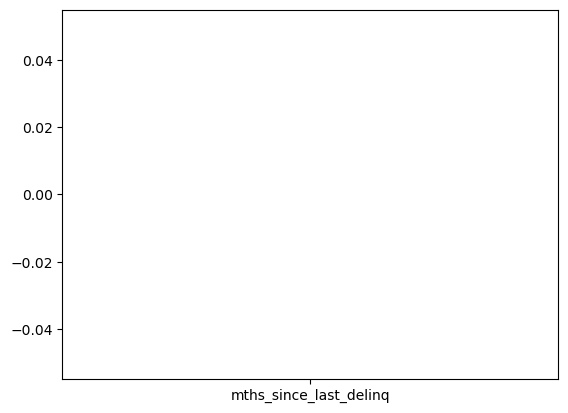

In [14]:
test.mths_since_last_delinq.plot.box()

In [ ]:
Cleaning Data:
looking at the info()
We have no data in some columns
-------------------------------
mths_since_last_major_derog
annual_inc_joint
dti_joint
verification_status_joint
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
total_cu_tl
inq_last_12m
acc_open_past_24mths
avg_cur_bal
bc_open_to_buy
bc_util
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
pct_tl_nvr_dlq
percent_bc_gt_75
tot_hi_cred_lim
total_bal_ex_mort
total_bc_limit
total_il_high_credit_limit

We have the following colums with partial nulls:
------------------------------------------------


###  Step1: Dropping all the colums where NaN is only the value for dtype = ('int64','float64')
(you can also use a lambda function here)

In [74]:
import numpy as np
print('Shape of data frame :',df.shape)
dropcols=[]
dftype_dict = df.dtypes.to_dict()
for col,typ in dftype_dict.items():
    #print(col, typ)
    if typ in ('int64','float64') and ( len(df[col].unique()) == 1 and np.isnan(df[col].unique()[0])):
        #print("{} has only NaN".format(col))
        #print('droping....',col,df[col].unique())
        dropcols.append(col)
print('Dropping:{} colums with only NaN value. '.format(len(dropcols)))
df.drop(dropcols, axis=1,  inplace=True)
print('Shape of data frame :',df.shape)
    

Shape of data frame : (39717, 111)
Dropping:54 colums with only NaN value. 
<class 'list'>
Shape of data frame : (39717, 57)


In [75]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Shape of data frame : (39717, 57)
### The following columns have same values and hence no specific/significant value to dataset.
* droping.... policy_code [1]
* droping.... acc_now_delinq [0]
* droping.... delinq_amnt [0]


In [194]:
import numpy as np
print('Shape of data frame :',df.shape)
dropcols=[]
dftype_dict = df.dtypes.to_dict()
for col,typ in dftype_dict.items():
    #print(col, typ)
    if  ( len(df[col].unique()) == 1):
        #print("{} has only NaN".format(col))
        #if col in ('delinq_amnt','acc_now_delinq','policy_code'):
        print('Dropping:{} colums with only {} as value. '.format(col,df[col].unique()[0]))
        dropcols.append(col)
df.drop(dropcols, axis=1,  inplace=True)
print('Shape of data frame :',df.shape)

Shape of data frame : (39717, 54)
Dropping:pymnt_plan colums with only n as value. 
Dropping:initial_list_status colums with only f as value. 
Dropping:application_type colums with only INDIVIDUAL as value. 
Shape of data frame : (39717, 51)


In [84]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,Jan-15,171.62,NaN,May-16,0.0,INDIVIDUAL,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.11,Apr-13,119.66,NaN,Sep-13,0.0,INDIVIDUAL,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,Jun-14,649.91,NaN,May-16,0.0,INDIVIDUAL,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,Jan-15,357.48,NaN,Apr-16,0.0,INDIVIDUAL,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,May-16,67.79,Jun-16,May-16,0.0,INDIVIDUAL,0.0,0.0,0.0


<Axes: >

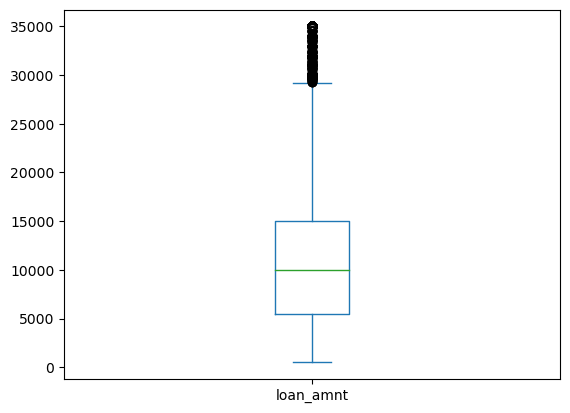

In [88]:
#df.boxplot()
df.loan_amnt.plot.box()

### Step3 :clean up data above and below 1.5 IQR to remove outliers

In [94]:
df.loan_amnt.quantile([.25,.50,.75])

0.25     5500.0
0.50    10000.0
0.75    15000.0
Name: loan_amnt, dtype: float64

In [106]:
print(1.5 * (15000.0 - 5500.0))
print('lower = ', 5500 - (1.5 * (15000.0 - 5500.0)))
print('upper = ', 5500 + (1.5 * (15000.0 - 5500.0)))
print(df.shape)
df1=df
print(df1.loan_amnt.shape)
#df1 = df1[df1.loan_amnt]

14250.0
lower =  -8750.0
upper =  19750.0
(39717, 54)
(39717,)


(33479, 54)


<Axes: >

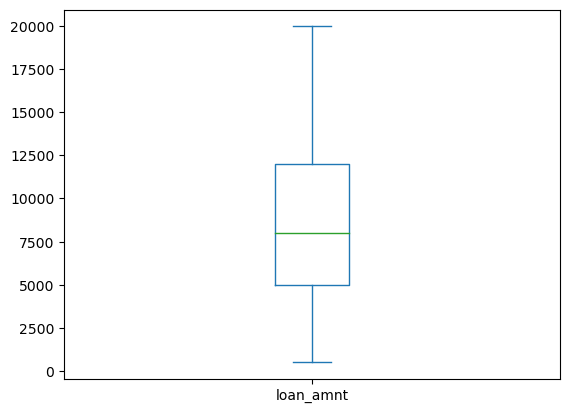

In [111]:
df1 = df[df.loan_amnt < 20000]
print(df1.shape)
df1.loan_amnt.plot.box()

(33479, 54)


<Axes: >

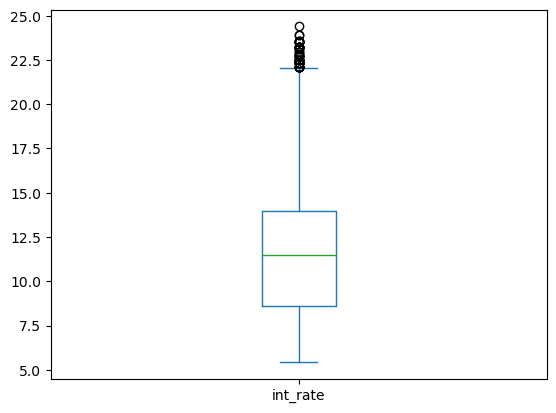

In [173]:
df1 = df[df.loan_amnt < 20000]
print(df1.shape)
df1.int_rate = df1.int_rate.apply(lambda x: x[:-1] if (x[-1]=='%') else x)
df1.int_rate = df1.int_rate.astype('float64')
df1.int_rate.plot.box()

In [145]:
df1.int_rate.quantile([.25,.50,.75])

0.25     8.59
0.50    11.49
0.75    13.99
Name: int_rate, dtype: float64

In [158]:
print('lower = ', 8.59 - (1.5 * (13.99 - 8.59)))
print('upper = ', 13.99 + (1.5 * (13.99 - 8.59)))
df1.int_rate.max()

lower =  0.48999999999999844
upper =  22.090000000000003


24.4

(33419, 54)


<Axes: >

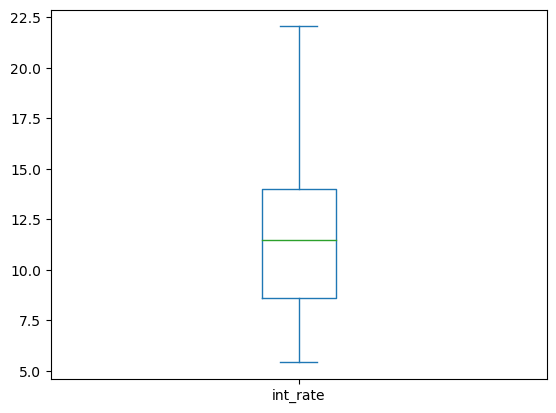

In [174]:
df1 = df1[df1.int_rate < 22.1]
print(df1.shape)
df1.int_rate.plot.box()


In [184]:
print(df1.shape)
df2 = df1[df1.funded_amnt < df1.loan_amnt]
print(df2.shape)

(33419, 54)
(947, 54)


In [104]:
print('Shape of data frame :',df.shape)
num_range_cleanup = ['loan_amnt']
for col,typ in dftype_dict.items():
    #print(col, typ)
    if (col in num_range_cleanup and typ in ('int64','float64')):
        #print("{} has min of {} , max of {}".format(col, df[col].min ,df[col].max))
        #if col in ('delinq_amnt','acc_now_delinq','policy_code'):
        print('Clean up Range of values for :{} colums with only {} value. '.format(col,df[col].unique()[0]))
        dropcols.append(col)
#df.drop(dropcols, axis=1,  inplace=True)
print('Shape of data frame :',df.shape)

Shape of data frame : (39717, 54)
Clean up Range of values for :loan_amnt colums with only 5000 value. 
Shape of data frame : (39717, 54)
